# FIG 4
## Reconstruction analysis for scan 13

In [1]:
import sys
sys.path.insert(0,'..')

import h5py
import numpy as np
import os
#import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import stempy.io as stio
import stempy.image as stim

from matplotlib.colors import LogNorm

from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse

# Better viridis
import matplotlib
viridis2 = matplotlib.colormaps['viridis']
viridis2.set_bad(viridis2.get_under())

In [2]:
# Key files
counted_file = "/global/cfs/cdirs/ncemhub/jrenner1/final/data/counted_gauss_prior_scan0000000013_centered.h5"
counted_file_standard = "/global/cfs/cdirs/ncemhub/jrenner1/final/data/FOURD_241025_1449_20713_00013_centered.h5"

## Study the results of the counting

In [3]:
# Load the counted data as sparse arrays
sp_gausscount = stio.load_electron_counts(counted_file)
sp_standard = stio.load_electron_counts(counted_file_standard)

In [4]:
print(f"Frame shape is: {sp_gausscount.frame_shape}; scan shape is {sp_gausscount.scan_shape}")

Frame shape is: (576, 576); scan shape is (512, 513)


In [5]:
# Load the new counted data with weights
with h5py.File(counted_file, 'r') as f0:
    frames_gausscount = f0['electron_events/frames'][:]
    weights_gausscount = f0['electron_events/weights'][:]

In [6]:
# Compute the diffraction pattern and bright field sums
dp_standard = sp_standard.sum(axis=(0,1))
bf_standard = sp_standard.sum(axis=(2,3))

dp_gausscount = sp_gausscount.sum(axis=(0,1))
bf_gausscount = sp_gausscount.sum(axis=(2,3))

# Need to do the sums manually to include weights
bf_weighted = np.zeros(sp_gausscount.scan_shape[0]*sp_gausscount.scan_shape[1], np.uint32)
dp_weighted = np.zeros(sp_gausscount.frame_shape[0]*sp_gausscount.frame_shape[1], np.uint32)
for ii, (events, weights) in enumerate(zip(frames_gausscount, weights_gausscount)):
    bf_weighted[ii] = len(events) * sum(weights)
    dp_weighted[events] += weights
bf_weighted = bf_weighted.reshape(sp_gausscount.scan_shape)
dp_weighted = dp_weighted.reshape(sp_gausscount.frame_shape)

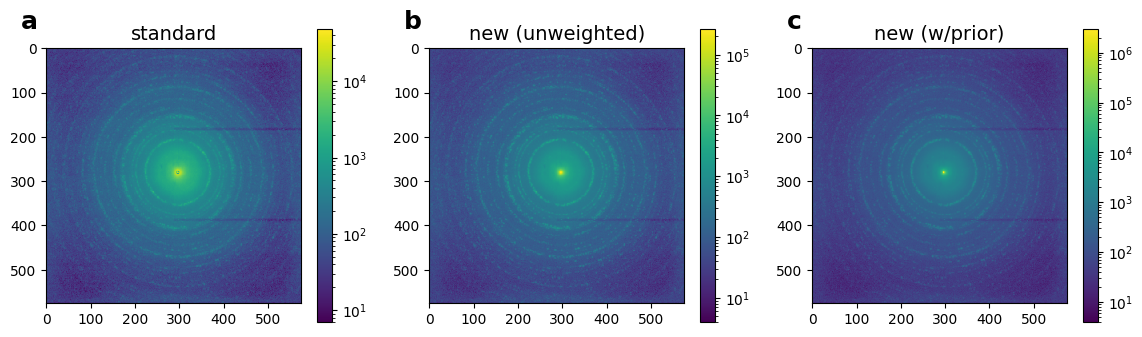

In [10]:
# Plot the diffraction patterns
fig, axes = plt.subplots(1, 3, figsize=(14,3.8))
axs = axes.flatten()

# Labels for each plot
labels_dp = ['a', 'b', 'c']

# ------- standard
im0 = axs[0].imshow(dp_standard, norm=LogNorm(), interpolation="none", cmap=viridis2)
axs[0].set_title("standard",fontsize=14)
fig.colorbar(im0, ax=axs[0], orientation='vertical')
axs[0].text(-0.1, 1.15, labels_dp[0], transform=axs[0].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# ------- new, unweighted
im1 = axs[1].imshow(dp_gausscount, norm=LogNorm(), interpolation="none", cmap=viridis2)
axs[1].set_title("new (unweighted)",fontsize=14)
fig.colorbar(im1, ax=axs[1], orientation='vertical')
axs[1].text(-0.1, 1.15, labels_dp[1], transform=axs[1].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# ------- new, weighted
im2 = axs[2].imshow(dp_weighted, norm=LogNorm(), interpolation="none", cmap=viridis2)
axs[2].set_title("new (w/prior)",fontsize=14)
fig.colorbar(im2, ax=axs[2], orientation='vertical')
axs[2].text(-0.1, 1.15, labels_dp[2], transform=axs[2].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Save the figure
plt.savefig("fig/fig4_diffraction.pdf", bbox_inches='tight')

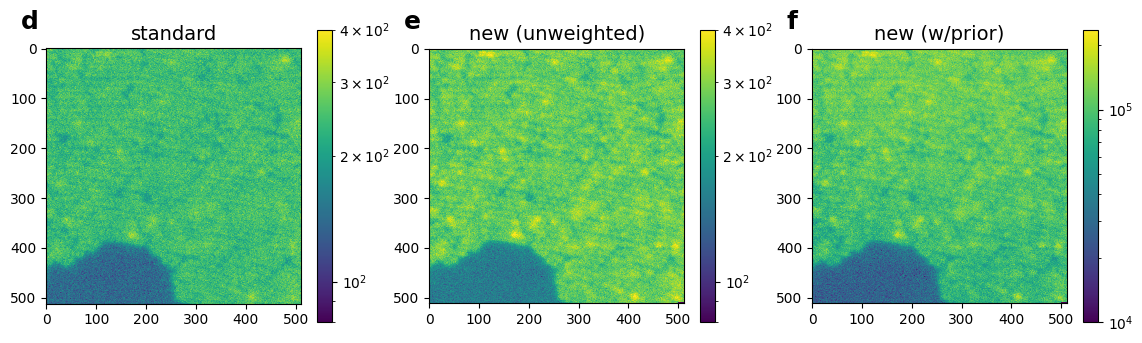

In [11]:
# Plot the bright field images
fig, axes = plt.subplots(1, 3, figsize=(14,3.8))
axs = axes.flatten()

# Labels for each plot
labels_rs = ['d', 'e', 'f']

# ------- standard
im0 = axs[0].imshow(bf_standard, norm=LogNorm(vmin=80, vmax=400), interpolation="none", cmap=viridis2)
axs[0].set_title("standard",fontsize=14)
fig.colorbar(im0, ax=axs[0], orientation='vertical')
axs[0].text(-0.1, 1.15, labels_rs[0], transform=axs[0].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# ------- new, unweighted
im1 = axs[1].imshow(bf_gausscount, norm=LogNorm(vmin=80, vmax=400), interpolation="none", cmap=viridis2)
axs[1].set_title("new (unweighted)",fontsize=14)
fig.colorbar(im1, ax=axs[1], orientation='vertical')
axs[1].text(-0.1, 1.15, labels_rs[1], transform=axs[1].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# ------- new, weighted
im2 = axs[2].imshow(bf_weighted, norm=LogNorm(vmin=10000), interpolation="none", cmap=viridis2)
axs[2].set_title("new (w/prior)",fontsize=14)
fig.colorbar(im2, ax=axs[2], orientation='vertical')
axs[2].text(-0.1, 1.15, labels_rs[2], transform=axs[2].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Save the figure
plt.savefig("fig/fig4_realspace.pdf", bbox_inches='tight')